<a href="https://colab.research.google.com/github/ronil17/DataAnalytics.github.io/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Task 2**

Intern Name - Ronil Sawant

Dataset : https://bit.ly/3kXTdox

Problem Statement : From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

## **From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans


Loading Datasets

In [ ]:
iris = pd.read_csv("/content/Iris.csv")
iris.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Data Overview

In [ ]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
iris.info() #we will get to know the non-null values in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris.describe() #for describing the data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.shape

(150, 6)

Data Preprocessing

In [ ]:
x = iris.drop(['Id','Species'],axis = 1)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


K Means Clustering

A Cluster is a collection of data points aggregated together due to similarities in between.

K Means algorithm identifis k number of centroids, and then allocate every data point to the nearest clusters , while keeping the centroids as small as possible.

Let us find out number of clusters for k-means classification.

In [ ]:
x = iris.iloc[:,[0,1,2,3]].values

Elbow Method runs K-Means clustering on dataset on number of values for k and then for each values of k computes an average scores for all clusters.

In [ ]:
wcss=[]

for i in range(1,10):
  kmeans=KMeans(i)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

wcss



[281831.54466666665,
 70581.3808,
 31320.711199999998,
 17760.18340682788,
 11422.682565813868,
 7919.4684230769235,
 5891.960922077922,
 4577.75001754386,
 3564.1400163398694]


Plotting a result on to a line graph, allowing us to observe 'The elbow

Text(0, 0.5, 'Within Clusters Sum of Squares')

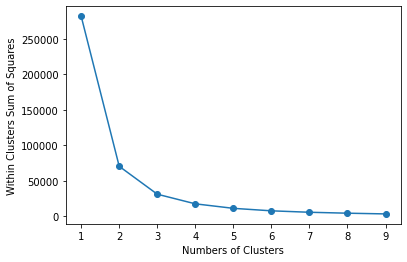

In [ ]:
nu_clusters = range(1,10)
plt.plot(nu_clusters,wcss,'o-')
plt.xlabel("Numbers of Clusters")
plt.ylabel("Within Clusters Sum of Squares")


From the upper graph we came to know that elbow is at 3 so there will be three clusters.

In [ ]:
kmeans = KMeans(n_clusters = 3,init = 'k-means++',max_iter=300,n_init=10,random_state=10)
y_kmeans = kmeans.fit_predict(x)

## **Clusters**

In [ ]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Visualisation of Clusters

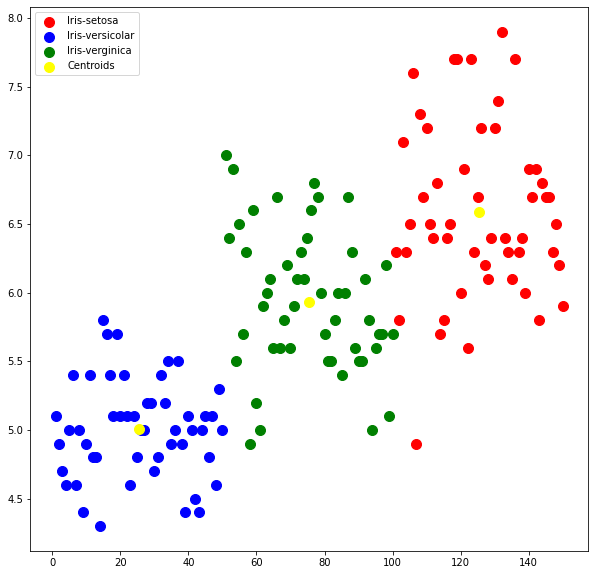

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s=100,c='blue',label='Iris-versicolar')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s=100,c='green',label='Iris-verginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100,c='yellow',label='Centroids')
plt.legend()